In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as stats
import gmaps
from params import states_list
import os
import json
from pylab import polyfit
%matplotlib notebook

In [2]:
data_2010 = "Resources/raw_data_2010.csv"
health_care_data_2010 = pd.read_csv(data_2010)
data_2011 = "Resources/raw_data_2011.csv"
health_care_data_2011 = pd.read_csv(data_2011)
data_2012 = "Resources/raw_data_2012.csv"
health_care_data_2012 = pd.read_csv(data_2012)
data_2013 = "Resources/raw_data_2013.csv"
health_care_data_2013 = pd.read_csv(data_2013)
data_2014 = "Resources/raw_data_2014.csv"
health_care_data_2014 = pd.read_csv(data_2014)
mortality_data = pd.read_csv('Resources/crudemortality.csv')
uninsured_data=pd.read_csv('Resources/dataframe_uninsured.csv')
uninsured_data = uninsured_data.replace(
    {"ARIZONA": "Arizona",
     "FLORIDA": "Florida",
    "ILLINOIS": "Illinois",
    "IOWA": "Iowa",
    "KENTUCKY": "Kentucky",
    "MARYLAND":"Maryland",
    "MINNESOTA": "Minnesota",
    "NEBRASKA": "Nebraska",
    "TENNESSEE": "Tennessee",
    "VERMONT": "Vermont"})
uninsured_data = uninsured_data.set_index('State')
uninsured_data

,2010,2011,2012,2013,2014
State,,,,,
Arizona,1065000,1095000,1131000,1118000,903000
Florida,3941000,3911000,3816000,3853000,3245000
Illinois,1746000,1659000,1622000,1618000,1238000
Iowa,280000,269000,254000,248000,189000
Kentucky,647000,618000,595000,616000,366000
Maryland,641000,598000,598000,593000,463000
Minnesota,476000,467000,425000,440000,317000
Nebraska,208000,207000,206000,209000,179000
Tennessee,899000,923000,882000,887000,776000


In [3]:
mortality_data=mortality_data.rename(columns={"STATE": "State"})
mortality_data = mortality_data.set_index('State')
mortality_data

,2010,2011,2012,2013,2014
State,,,,,
Arizona,731.6,747.4,755.8,761.6,765.6
Florida,924.4,910.5,916.0,924.0,934.8
Illinois,778.8,792.5,795.7,802.1,817.5
Iowa,910.8,919.6,922.9,936.1,939.5
Kentucky,967.5,975.4,996.1,994.6,1015.9
Maryland,750.4,748.6,754.9,769.3,767.5
Minnesota,734.8,744.6,743.7,755.9,759.5
Nebraska,830.7,840.1,843.9,842.9,849.2
North Carolina,826.1,827.7,840.4,846.1,858.5


In [4]:
health_care_2010 = health_care_data_2010.rename(columns={"Location": "State"})
health_care_2011 = health_care_data_2011.rename(columns={"Location": "State"})
health_care_2012 = health_care_data_2012.rename(columns={"Location": "State"})
health_care_2013 = health_care_data_2013.rename(columns={"Location": "State"})
health_care_2014 = health_care_data_2014.rename(columns={"Location": "State"})

In [5]:
x = health_care_2010.merge(health_care_2011,)

In [6]:
x = health_care_2010.merge(health_care_2011, on = "State", suffixes = ("_2010","_2011")).merge(health_care_2012, on = "State", suffixes = ("2012","2012")).merge(health_care_2013, on = "State", suffixes = ("_2012","_2013")).merge(health_care_2014, on = "State", suffixes = ("_2014","_2014"))
x.head(5)

,State,Health Spending per Capita_2010,Health Spending per Capita_2011,Health Spending per Capita_2012,Health Spending per Capita_2013,Health Spending per Capita
0,United States,7094.0,7292.0,7535.0,7703.0,8045.0
1,Alabama,6421.0,6541.0,6821.0,6996.0,7281.0
2,Alaska,9129.0,9586.0,10130.0,10428.0,11064.0
3,Arizona,6027.0,6076.0,6183.0,6262.0,6452.0
4,Arkansas,6412.0,6585.0,6804.0,6929.0,7408.0


In [7]:
df=x

In [8]:
df = df.dropna(how='any')

In [9]:
df = df.set_index('State')

In [10]:
for index, row in df.iterrows():
    
    if index not in states_list:
        
        df = df.drop(index)
df=df.rename(columns={"Health Spending per Capita": "2014",
                      "Health Spending per Capita_2010": "2010",
                      "Health Spending per Capita_2011": "2011",
                      "Health Spending per Capita_2012": "2012",
                      "Health Spending per Capita_2013": "2013"})
df

,2010,2011,2012,2013,2014
State,,,,,
Arizona,6027.0,6076.0,6183.0,6262.0,6452.0
Florida,7301.0,7408.0,7635.0,7688.0,8076.0
Illinois,7253.0,7429.0,7665.0,7911.0,8262.0
Iowa,7177.0,7416.0,7648.0,7806.0,8200.0
Kentucky,6898.0,7142.0,7289.0,7543.0,8004.0
Maryland,7748.0,7937.0,8115.0,8250.0,8602.0
Minnesota,7782.0,7968.0,8177.0,8465.0,8871.0
Nebraska,7524.0,7715.0,7979.0,8133.0,8412.0
North Carolina,6615.0,6808.0,7073.0,7027.0,7264.0


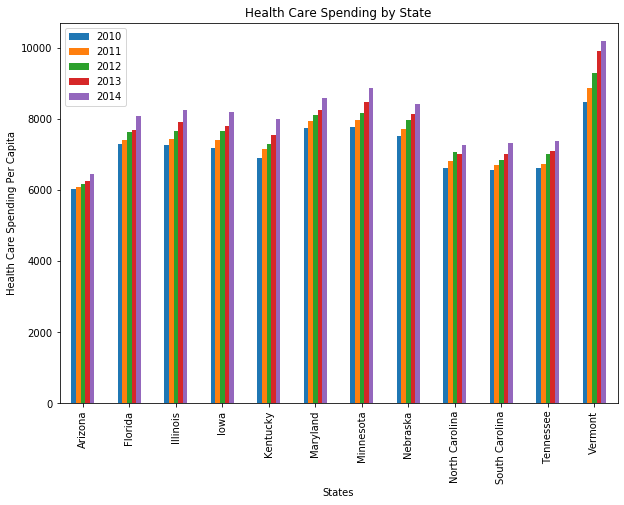

In [11]:
xy = df.plot.bar(figsize = (10,7))
plt.title("Health Care Spending by State")
plt.xlabel("States")
plt.ylabel("Health Care Spending Per Capita")
plt.savefig("output/Healthcare_spending.png")


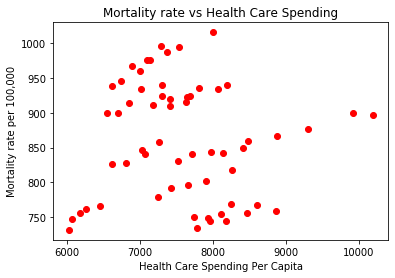

In [12]:
x_axis = df
y_axis = mortality_data
plt.title("Mortality rate vs Health Care Spending")
plt.xlabel("Health Care Spending Per Capita")
plt.ylabel("Mortality rate per 100,000")
scatter = plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.show()


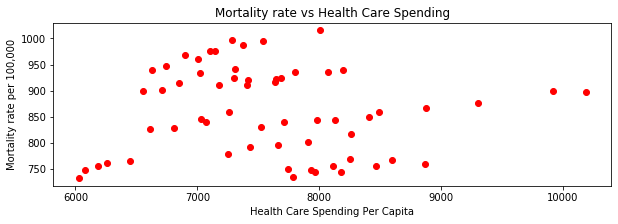

In [13]:
plt.figure(figsize=(10,3))
plt.title("Mortality rate vs Health Care Spending")
plt.xlabel("Health Care Spending Per Capita")
plt.ylabel("Mortality rate per 100,000")
plt.scatter(x_axis, y_axis, color='r', alpha=1)
plt.savefig("output/Mortality_rate_vs_Health_Care_Spending.png")
plt.show()

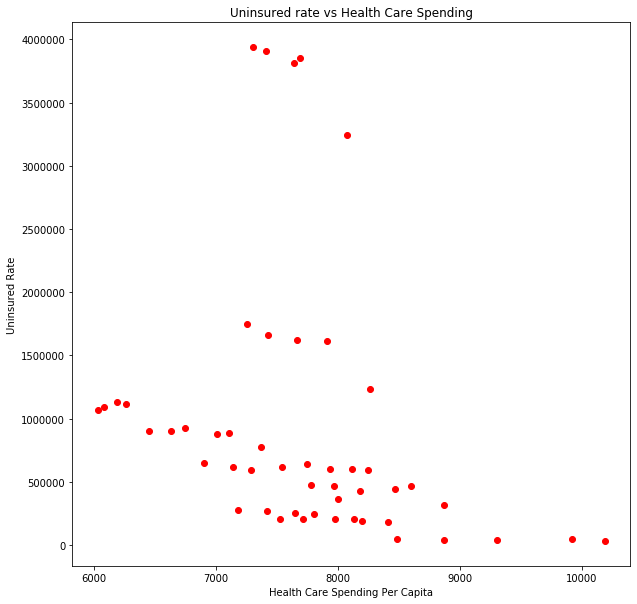

In [14]:
dfx = df.drop("North Carolina")
dfx = dfx.drop("South Carolina")
x_axis = dfx
y_axis = uninsured_data
plt.figure(figsize=(10,10))
                                                      
plt.title("Uninsured rate vs Health Care Spending")
plt.xlabel("Health Care Spending Per Capita")
plt.ylabel("Uninsured Rate")
plt.scatter(x_axis, y_axis, color='r', alpha=1)
plt.savefig("output/Uninsured_rate_vs_Health_Care_Spending.png")
plt.show()

0.5418709906727421


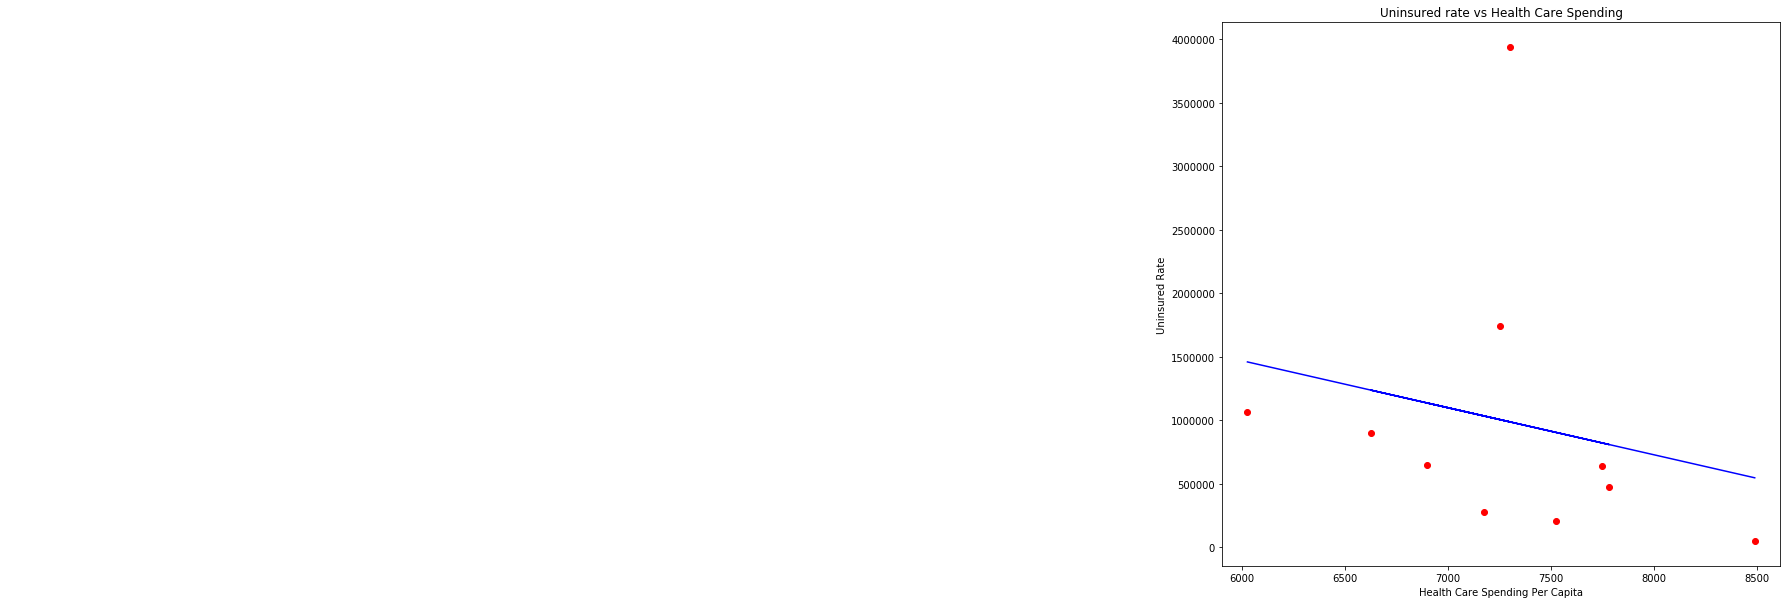

In [15]:
dfx = df.drop("North Carolina")
dfx = dfx.drop("South Carolina")
x_axis = dfx['2010']
y_axis = uninsured_data['2010']
(slope_10, intercept, rvalue_10, pvalue_10, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope_10 + intercept
print(pvalue_10)
line_eq = "y = " + str(round(slope_10,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))                                                      
plt.title("Uninsured rate vs Health Care Spending")
plt.xlabel("Health Care Spending Per Capita")
plt.ylabel("Uninsured Rate")
plt.scatter(x_axis, y_axis, color='r', alpha=1)

plt.plot(x_axis,regress_values,"b-")

plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.savefig("output/Uninsured_rate_vs_Health_Care_Spending_2010.png")
plt.show()

0.44166145010061986


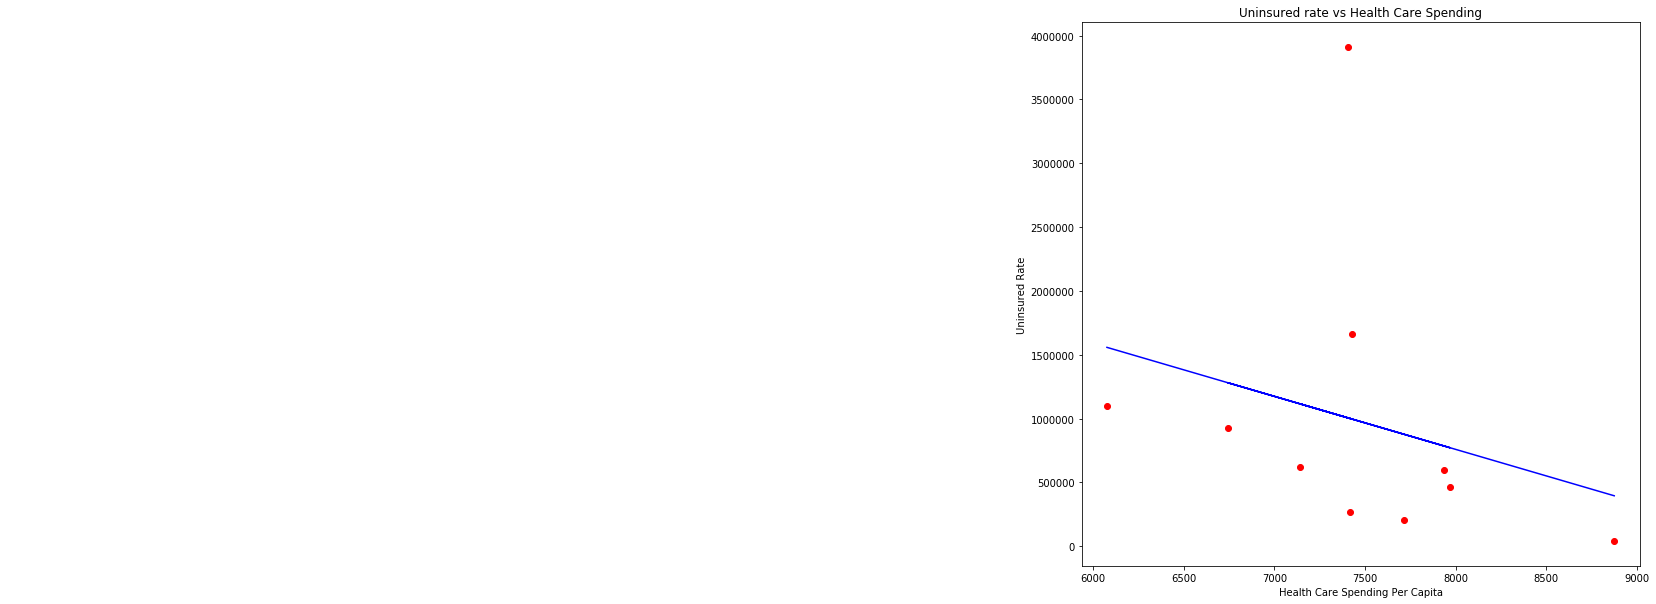

In [16]:
x_axis = dfx['2011']
y_axis = uninsured_data['2011']

(slope_11, intercept, rvalue_11, pvalue_11, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope_11 + intercept
line_eq = "y = " + str(round(slope_11,2)) + "x + " + str(round(intercept,2))
print(pvalue_11)

plt.figure(figsize=(10,10))                                                      
plt.title("Uninsured rate vs Health Care Spending")
plt.xlabel("Health Care Spending Per Capita")
plt.ylabel("Uninsured Rate")
plt.scatter(x_axis, y_axis, color='r', alpha=1)
#plt.plot(x, y, '--')
plt.plot(x_axis,regress_values,"b-")

plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.savefig("output/Uninsured_rate_vs_Health_Care_Spending_2011.png")
plt.show()

0.4265848553146777


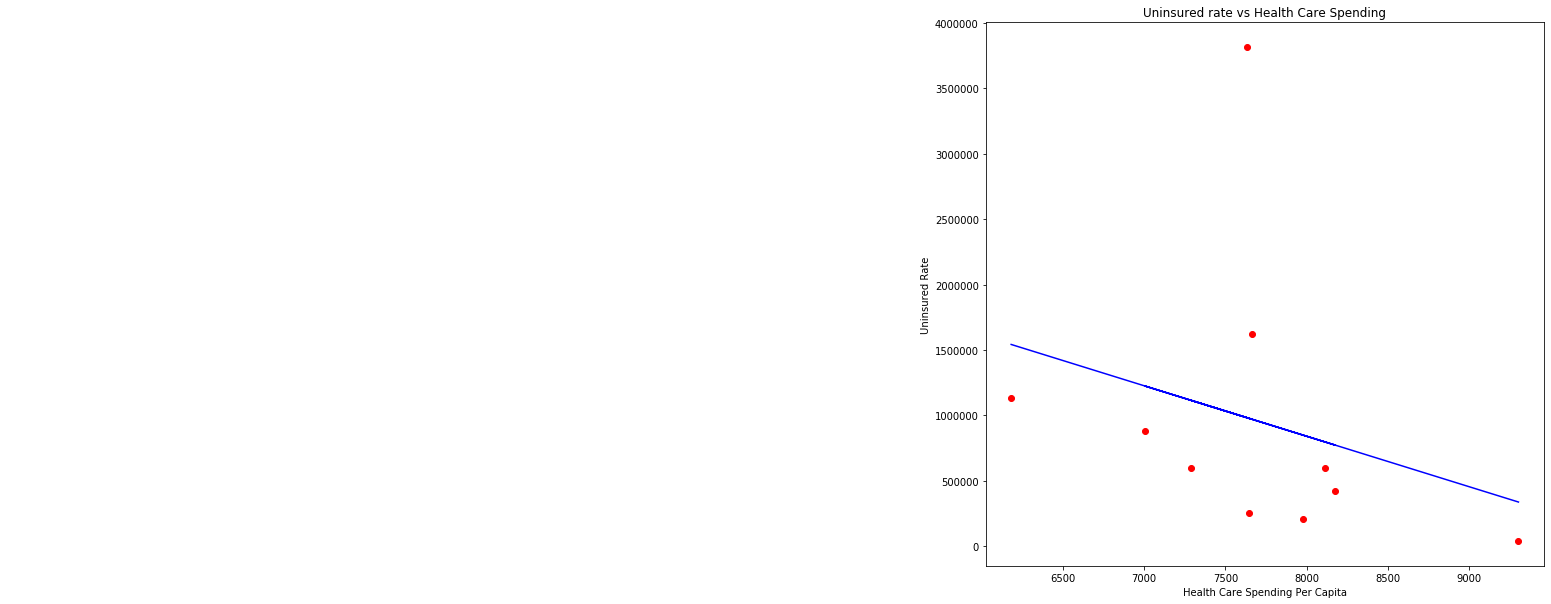

In [17]:
x_axis = dfx['2012']
y_axis = uninsured_data['2012']

(slope_12, intercept, rvalue_12, pvalue_12, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope_12 + intercept
line_eq = "y = " + str(round(slope_12,2)) + "x + " + str(round(intercept,2))
print(pvalue_12)

plt.figure(figsize=(10,10))                                                      
plt.title("Uninsured rate vs Health Care Spending")
plt.xlabel("Health Care Spending Per Capita")
plt.ylabel("Uninsured Rate")
plt.scatter(x_axis, y_axis, color='r', alpha=1)
#plt.plot(x, y, '--')
plt.plot(x_axis,regress_values,"b-")

plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.savefig("output/Uninsured_rate_vs_Health_Care_Spending_2012.png")
plt.show()

0.3654411862998304


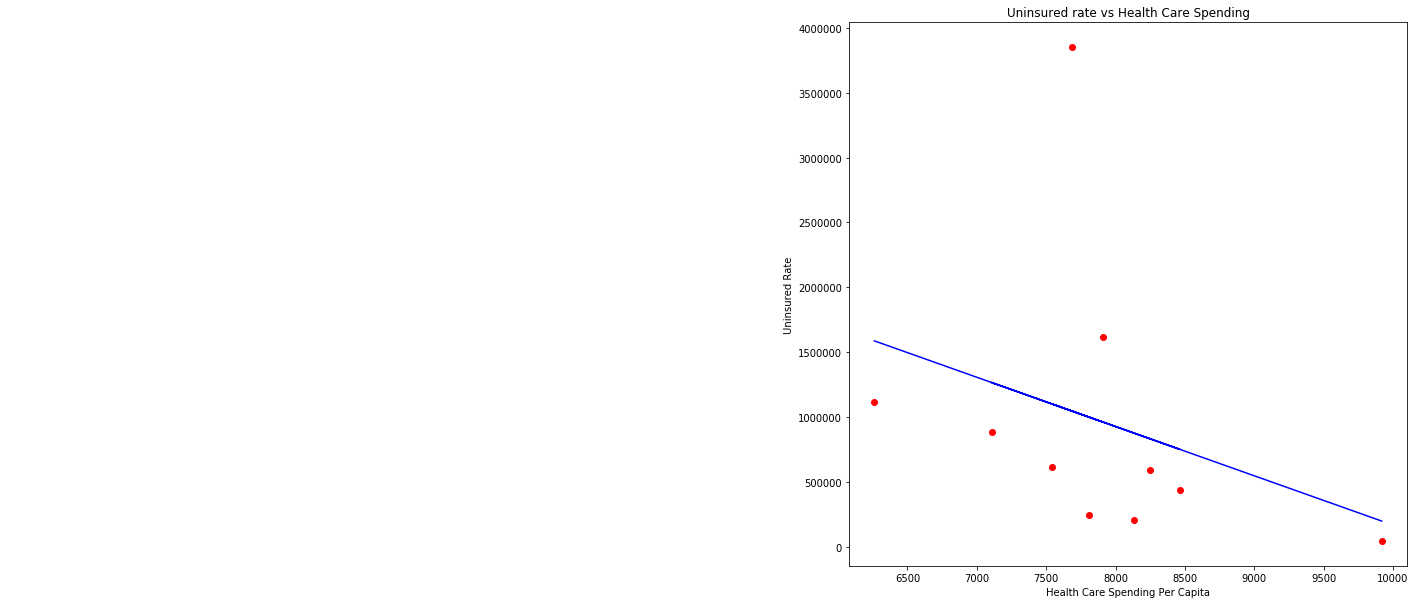

In [18]:
x_axis = dfx['2013']
y_axis = uninsured_data['2013']

(slope_13, intercept, rvalue_13, pvalue_13, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope_13 + intercept
line_eq = "y = " + str(round(slope_13,2)) + "x + " + str(round(intercept,2))
print(pvalue_13)
plt.figure(figsize=(10,10))                                                      
plt.title("Uninsured rate vs Health Care Spending")
plt.xlabel("Health Care Spending Per Capita")
plt.ylabel("Uninsured Rate")
plt.scatter(x_axis, y_axis, color='r', alpha=1)
#plt.plot(x, y, '--')
plt.plot(x_axis,regress_values,"b-")

plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.savefig("output/Uninsured_rate_vs_Health_Care_Spending_2013.png")
plt.show()

0.40126911126460585


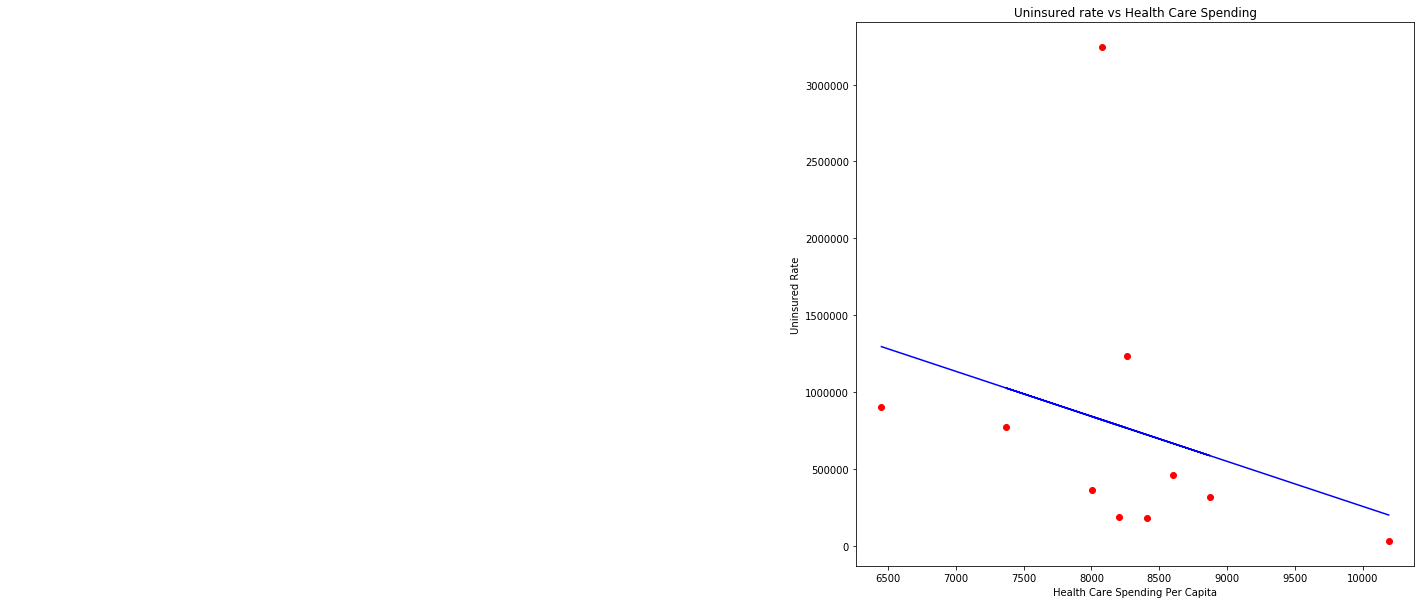

In [19]:
x_axis = dfx['2014']
y_axis = uninsured_data['2014']

(slope_14, intercept, rvalue_14, pvalue_14, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope_14 + intercept
line_eq = "y = " + str(round(slope_14,2)) + "x + " + str(round(intercept,2))
print(pvalue_14)
plt.figure(figsize=(10,10))                                                      
plt.title("Uninsured rate vs Health Care Spending")
plt.xlabel("Health Care Spending Per Capita")
plt.ylabel("Uninsured Rate")
plt.scatter(x_axis, y_axis, color='r', alpha=1)
#plt.plot(x, y, '--')
plt.plot(x_axis,regress_values,"b-")

plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.savefig("output/Uninsured_rate_vs_Health_Care_Spending_2014.png")
plt.show()

In [23]:
pvalue = (pvalue_10+pvalue_11+pvalue_12+pvalue_13+pvalue_14)/4
print('pvalue'), print(pvalue)
rvalue = (rvalue_10+rvalue_11+rvalue_12+rvalue_13+rvalue_14)/4
print ('rvalue'), print(rvalue)
slope = (slope_10+slope_11+slope_12+slope_13+slope_14)/4
print('slope'), print(slope)

pvalue
0.544206898413119
rvalue
-0.3497718760542542
slope
-461.1570842193796


(None, None)